# About dataset 

### Source: https://www.kaggle.com/datasets/saurabhshahane/seoul-bike-sharing-demand-prediction

#### Data include weather information:
* Date information
* Temperature 
* Humidity
* Windspeed
* Visibility
* Dew point temperature (The dew point is the temperature the air needs to be cooled to (at constant pressure) in order to achieve a relative humidity (RH) of 100%. At this point the air cannot hold more water in the gas form.)
* Solar radiation (a general term for the electromagnetic radiation emitted by the sun) 
* Snowfall, 
* Rainfall
* Functioning day
* Season
* Holiday
* The number of bikes rented per hour 
* Hour

### Goal

Predict how atmospheric conditions affect the number of bikes rented

## Read data

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("../data/SeoulBikeData.csv", encoding = "ISO-8859-1")

In [3]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

## Explore data

In [4]:
df.describe().transpose()   

count         mean         std   min     25%  \
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.00   
Hour                       8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   

                               50%      75%      max  
Rented Bike Count           504.50  1065.25  3556.00  
Hour                         11.50    17.25    23.00  
Temperature(°C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(°C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80

<AxesSubplot:xlabel='Rented Bike Count', ylabel='Count'>

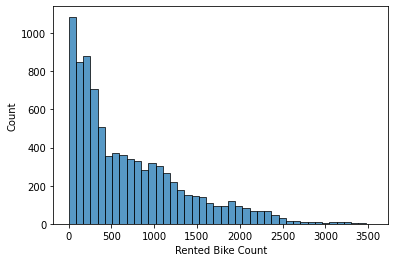

In [5]:
#visualising distribution
import seaborn as sns

sns.histplot(df['Rented Bike Count'])

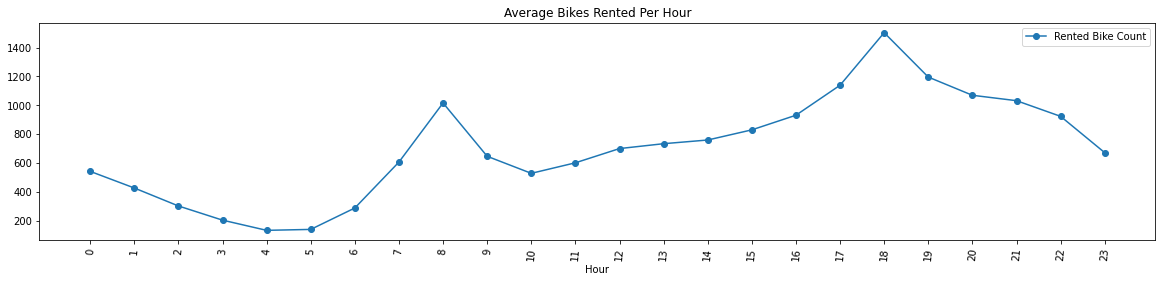

In [6]:
import matplotlib.pyplot as plt
avg_rent_hrs = df.groupby('Hour')['Rented Bike Count'].mean()

# plot average rent over time(hrs)
plt.figure(figsize=(20,4))
a=avg_rent_hrs.plot(legend=True,marker='o',title="Average Bikes Rented Per Hour")
a.set_xticks(range(len(avg_rent_hrs)));
a.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85);


## Prepare data

In [7]:
import sys
sys.path.insert(0, "/mnt/c/users/Marta/projects/seoul-bike-sharing-prediction/src/")

Apply label encoder for categorical features

In [8]:
from encoder import MultiColumnLabelEncoder

In [9]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [10]:
numeric_features = df.select_dtypes(exclude='object').columns

#Extracting categorical features
categorical_features = df.select_dtypes(include='object').columns

print("*"*100)
print(f"\n Categorical columns in the dataset are {categorical_features} \n")
print("*"*100)

datetime_features = "Date"


****************************************************************************************************

 Categorical columns in the dataset are Index(['Date', 'Seasons', 'Holiday', 'Functioning Day'], dtype='object') 

****************************************************************************************************


In [11]:
categorical_features

Index(['Date', 'Seasons', 'Holiday', 'Functioning Day'], dtype='object')

In [12]:
encoder = MultiColumnLabelEncoder(categorical_features)


dfEncoded = pd.DataFrame(encoder.fit_transform(df),
                         columns=[x + "_encoded" for x in categorical_features])

df_train = pd.concat([df.drop(columns=categorical_features, axis=1), dfEncoded], axis=1)




In [13]:
df_train.dtypes

Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Date_encoded                   int64
Seasons_encoded                int64
Holiday_encoded                int64
Functioning Day_encoded        int64
dtype: object

## Train test split 

In [14]:
from sklearn.model_selection import train_test_split
import numpy as np

X = df_train.drop(['Rented Bike Count'],axis=1)

# y = np.log1p(df_train['Rented Bike Count'])
y = df_train['Rented Bike Count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


## Model

In [15]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    preds = model.predict(X_test)
    
    print('\n================Evalution Matrix=========================\n')
    MSE  = mean_squared_error(y_test,preds)
    print("MSE :" , MSE)
    
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)
    r2 = r2_score(y_test,preds)
    print("R2 :" ,r2)
    adj_r2=1-(1-r2_score(y_test,preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2)

    train_class_preds = model.predict(X_train)

    print('\n================Evalution Matrix=========================\n')

    #ploting 
    print('\n \n  ===================================================\
    Evalution Graph\
    =================================================\n') 
    plt.figure(figsize=(20,10))
    plt.plot(np.array(y_test[:100]))
    plt.plot(preds[:100])    
    plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
    plt.show()
    
    return model


================Evalution Matrix=========================

MSE : 73145.65361132265
RMSE : 270.4545315045075
R2 : 0.8195837073161998
Adjusted R2 :  0.8186864571995627

================Evalution Matrix=========================


 
  ===================================================    Evalution Graph    =================================================



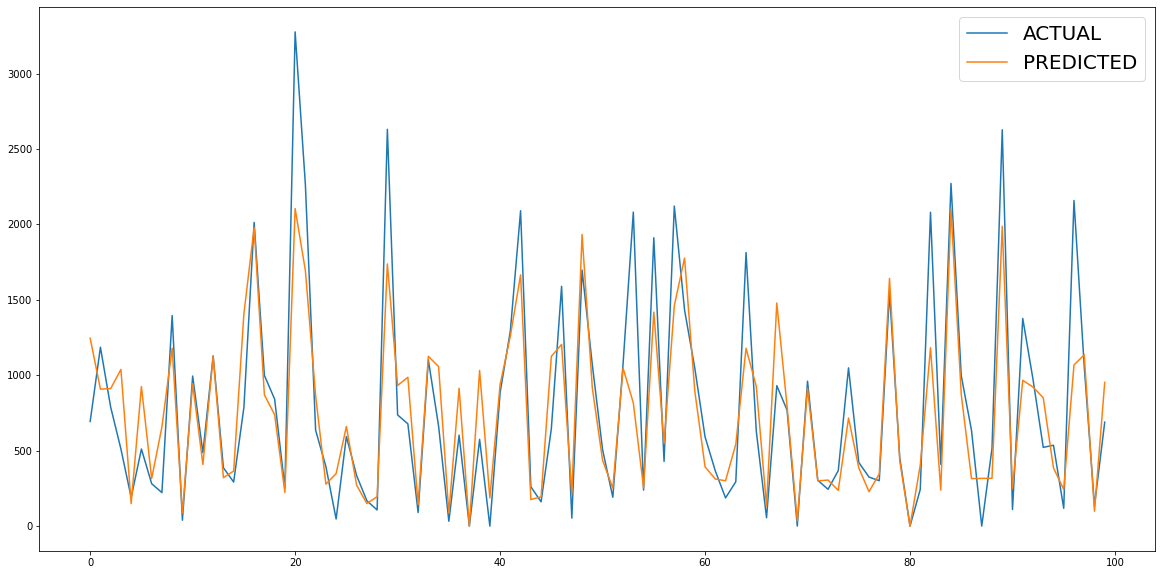

In [16]:
from sklearn.ensemble import RandomForestRegressor

n_estimators=80
max_depth=7
max_leaf_nodes=60


rf_model = RandomForestRegressor(n_estimators=n_estimators,
                                max_depth=max_depth,
                                max_leaf_nodes=max_leaf_nodes)

model_trained = run_model(rf_model, X_train, y_train, X_test, y_test)

# Feature importance 
We distinguish multiple feature importacnes. In this tutorial we only take a look at two of them:
* Impurity reduction FI
* Permutation based feature importance 
* Absolute importance

In [17]:
def get_features_importance (model, X_train):

    features = X_train.columns
    importances = model.feature_importances_
    indices = np.argsort(importances)

    plt.figure(figsize=(10,7))
    plt.title('Feature Importance')
    plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()
    
    return plt, indices

### Impurity reduction Feature Importance

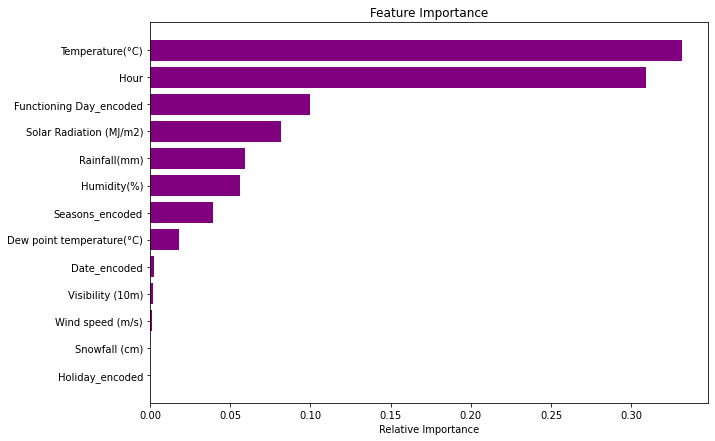

In [18]:
plt, imp = get_features_importance(model_trained, X_test)

In [19]:
model_trained.feature_importances_

array([3.08981911e-01, 3.31313461e-01, 5.59262552e-02, 1.42154758e-03,
       1.58663238e-03, 1.82442839e-02, 8.13264052e-02, 5.93935636e-02,
       2.61588114e-04, 2.47948266e-03, 3.94022542e-02, 1.79797147e-04,
       9.94828183e-02])

### Permutation feature importance 

The permutation feature importance algorithm based on Fisher, Rudin, and Dominici (2018):

Input: Trained model $\hat{f}$, feature matrix, X, target vector , y, error measure  $L(y,\hat{f})$.

1. Estimate the original model error  
$e_{orig} = L(y,\hat{f})$ (e.g. mean squared error)
2. For each feature $ j ∈ {1,...,p} $ do:
* Generate feature matrix  $X_{perm}$ by permuting feature j in the data X. This breaks the association between feature j and true outcome y.
* Estimate error $e_{perm} = L(y,\hat{f(X_{perm})})$   based on the predictions of the permuted data.
* Calculate permutation feature importance as quotient  $FI_{j} = e_{perm}/e_{orig}$ or difference $FI_{j} = e_{perm} - e_{orig}$



In [20]:
from sklearn.inspection import permutation_importance

In [21]:
def get_permut_features_importance (model, X_train,  y_train, n_repeats, random_state=123):
    
    result = permutation_importance(model_trained, X_train, y_train, n_repeats=10,
                                random_state=0)

    features = X_train.columns
    importances = result["importances_mean"]
    indices = np.argsort(importances)

    plt.figure(figsize=(10,7))
    plt.title('Feature Importance')
    plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()
    
    return plt, indices

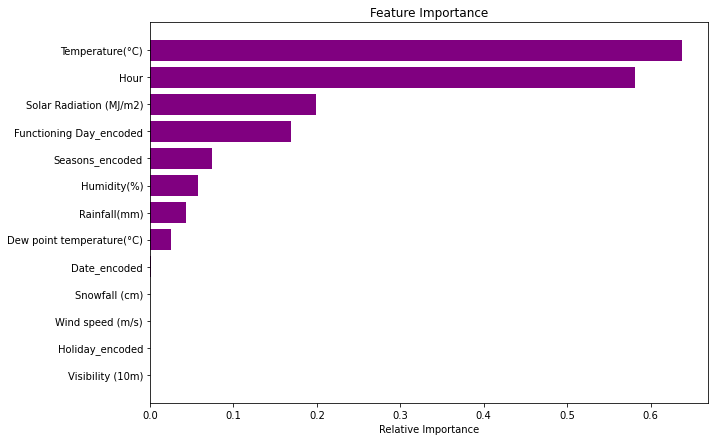

In [22]:
plt, imp = get_permut_features_importance(model_trained, X_test, y_test, 10)

#### Another implementation of permutation feature importance can be found in *eli5* package. 

# Dependence plots 


Partial dependence works by marginalizing the machine learning model output over the distribution of the features in set C, so that the function shows the relationship between the features in set S we are interested in and the predicted outcome. By marginalizing over the other features, we get a function that depends only on features in S, interactions with other features included.

The partial function $ \hat{f_{s}} $ is estimated by calculating averages in the training data, also known as Monte Carlo method:  

$ \hat{f_{s}} (x_{s}) = 1/n \sum \limits _{i=1} ^{n} \hat{f_{s}} (x_{s}, x_{c}) $

*Source*: https://christophm.github.io/interpretable-ml-book/pdp.html

We distinguish multiple methods to assess what is the impact of a single feature on the model output
* Partial dependence plot
* Accumulated Local Effect
* Feature interactions 

##### Presented implementations of Dependence Plot are the functions apporximating model response as a function of selected variables.

## Partial Dependence Plot

### Sklearn implementation

In [23]:
from sklearn.inspection import PartialDependenceDisplay

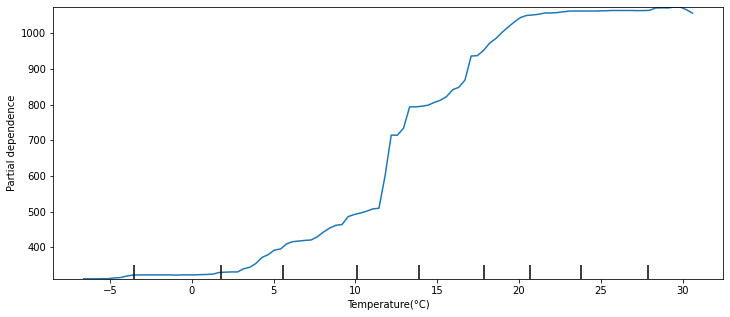

In [24]:
fig, ax = plt.subplots(figsize=(12, 5))

PartialDependenceDisplay.from_estimator(model_trained, X_test, features=["Temperature(°C)"],ax=ax)

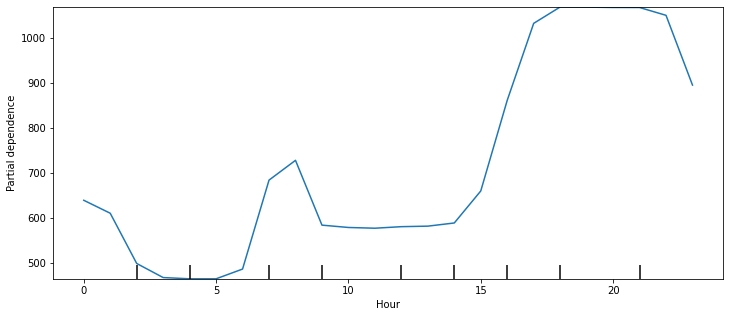

In [25]:
fig, ax = plt.subplots(figsize=(12, 5))

PartialDependenceDisplay.from_estimator(model_trained, X_test, features=["Hour"], ax=ax)


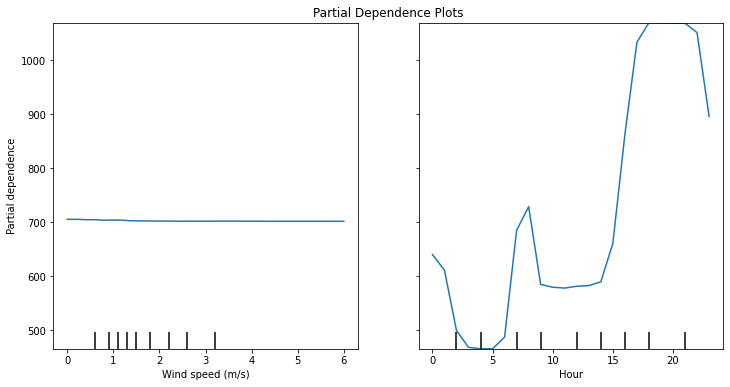

In [26]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Partial Dependence Plots")
PartialDependenceDisplay.from_estimator(model_trained, X_test, features=["Wind speed (m/s)", "Hour"], ax=ax)


In [27]:
df_train

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                   254     0             -5.2           37               2.2   
1                   204     1             -5.5           38               0.8   
2                   173     2             -6.0           39               1.0   
3                   107     3             -6.2           40               0.9   
4                    78     4             -6.0           36               2.3   
...                 ...   ...              ...          ...               ...   
8755               1003    19              4.2           34               2.6   
8756                764    20              3.4           37               2.3   
8757                694    21              2.6           39               0.3   
8758                712    22              2.1           41               1.0   
8759                584    23              1.9           43               1.3   

      Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0                 2000                      -17.6                      0.0   
1                 2000                      -17.6                      0.0   
2                 2000                      -17.7                      0.0   
3                 2000                      -17.6                      0.0   
4                 2000                      -18.6                      0.0   
...                ...                        ...                      ...   
8755              1894                      -10.3                      0.0   
8756              2000                       -9.9                      0.0   
8757              1968                       -9.9                      0.0   
8758              1859                       -9.8                      0.0   
8759              1909                       -9.3                      0.0   

      Rainfall(mm)  Snowfall (cm)  Date_encoded  Seasons_encoded  \
0              0.0            0.0            11                3   
1              0.0            0.0            11                3   
2              0.0            0.0            11                3   
3              0.0            0.0            11                3   
4              0.0            0.0            11                3   
...            ...            ...           ...              ...   
8755           0.0            0.0           356                0   
8756           0.0            0.0           356                0   
8757           0.0            0.0           356                0   
8758           0.0            0.0           356                0   
8759           0.0            0.0           356                0   

      Holiday_encoded  Functioning Day_encoded  
0                   1                        1  
1                   1                        1  
2                   1                        1  
3                   1                        1  
4                   1                        1  
...               ...                      ...  
8755                1                        1  
8756                1                        1  
8757                1                        1  
8758                1                        1  
8759                1                        1  

[8760 rows x 14 columns]

## Dalex implementation

* https://github.com/ModelOriented/DALEX
* https://dalex.drwhy.ai/

In [28]:
import dalex as dx

exp = dx.Explainer(model_trained, X_test, y_test)


Preparation of a new explainer is initiated

  -> data              : 2628 rows 13 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 2628 values
  -> model_class       : sklearn.ensemble._forest.RandomForestRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x7fd6836cce50> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 7.13e+02, max = 2.11e+03
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.61e+03, mean = -3.94, max = 1.42e+03
  -> model_info        : package sklearn

A new explainer has been created!


#### Model performance assessment 

In [29]:
mp = exp.model_performance(model_type = 'regression')
mp.result


mse        rmse        r2         mae  \
RandomForestRegressor  73145.653611  270.454532  0.819584  177.742284   

                              mad  
RandomForestRegressor  108.102857

In [30]:
mp.plot()

#### Permutation feature importance, yet another implementation

More details about DALEX Feature Importance *https://ema.drwhy.ai/featureImportance.html*

In [31]:
vi = exp.model_parts()
vi.result

variable  dropout_loss                  label
0                _full_model_    270.100166  RandomForestRegressor
1             Holiday_encoded    270.230301  RandomForestRegressor
2            Visibility (10m)    270.307829  RandomForestRegressor
3               Snowfall (cm)    270.411606  RandomForestRegressor
4                Date_encoded    270.424694  RandomForestRegressor
5            Wind speed (m/s)    270.495994  RandomForestRegressor
6   Dew point temperature(°C)    287.519623  RandomForestRegressor
7                Rainfall(mm)    304.879904  RandomForestRegressor
8                 Humidity(%)    311.034335  RandomForestRegressor
9             Seasons_encoded    320.728464  RandomForestRegressor
10    Functioning Day_encoded    373.414896  RandomForestRegressor
11    Solar Radiation (MJ/m2)    387.239135  RandomForestRegressor
12                       Hour    547.025186  RandomForestRegressor
13            Temperature(°C)    578.320366  RandomForestRegressor
14                 _baseline_    838.402962  RandomForestRegressor

In [32]:
vi.plot(max_vars=8)

#### Partial Dependence Plot 

*Numerical variables*

In [33]:
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [34]:

numeric_features=[x for x in numeric_features if x!="Rented Bike Count"]

pdp_num = exp.model_profile(type = 'partial', label="pdp", variables=numeric_features)

Calculating ceteris paribus: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:01<00:00,  6.37it/s]


#### Accumulated Local Effects

Functions approximating influence of a single predictor on the target similarly as in Partial Dependence, but more unbiased and resistant to *correlated features*

*Numerical variables*

In [35]:
ale_num = exp.model_profile(type = 'accumulated', label="ale", variables=numeric_features)

Calculating accumulated dependency: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:02<00:00,  3.89it/s]


In [37]:
pdp_num.plot(ale_num)

*Categorical variables*

In [36]:
X_test

Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
4136     8             18.2           63               0.8              1731   
6705     9             23.5           72               0.5              1485   
3538    10             15.3           50               1.0               944   
6583     7             21.1           81               1.0              1738   
1993     1             -2.2           58               1.0              2000   
...    ...              ...          ...               ...               ...   
1949     5             -1.8           82               1.3               375   
7547    11             11.7           36               4.3              2000   
1476    12             -1.0           35               2.7              1921   
8320    16             12.9           38               2.6              1476   
910     22              1.1           40               0.5              1305   

      Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
4136                       11.0                     1.00           0.0   
6705                       18.1                     0.95           0.0   
3538                        4.9                     1.97           0.0   
6583                       17.7                     0.14           0.0   
1993                       -9.3                     0.00           0.0   
...                         ...                      ...           ...   
1949                       -4.4                     0.00           0.0   
7547                       -2.9                     2.28           0.0   
1476                      -14.5                     0.64           0.0   
8320                       -1.1                     0.94           0.0   
910                       -11.0                     0.00           0.0   

      Snowfall (cm)  Date_encoded  Seasons_encoded  Holiday_encoded  \
4136            0.0           256                1                0   
6705            0.0            68                0                1   
3538            0.0           315                1                1   
6583            0.0             8                0                1   
1993            0.0           253                3                1   
...             ...           ...              ...              ...   
1949            0.0           229                3                1   
7547            0.0           129                0                1   
1476            3.0           358                3                1   
8320            0.0           142                0                1   
910             0.0            72                3                1   

      Functioning Day_encoded  
4136                        1  
6705                        1  
3538                        1  
6583                        1  
1993                        1  
...                       ...  
1949                        1  
7547                        1  
1476                        1  
8320                        1  
910                         1  

[2628 rows x 13 columns]

In [38]:
pdp_cat = exp.model_profile(type = 'partial', variable_type='categorical',
                            variables = ["Seasons_encoded"], label="pdp")

ale_cat = exp.model_profile(type = 'accumulated', variable_type='categorical',
                            variables = ["Seasons_encoded"], label="ale")

Calculating accumulated dependency: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.79it/s]


In [39]:
ale_cat.plot(pdp_cat)

#### Individual Conditional Expectation


In [40]:
X_test.iloc[3]

Hour                            7.00
Temperature(°C)                21.10
Humidity(%)                    81.00
Wind speed (m/s)                1.00
Visibility (10m)             1738.00
Dew point temperature(°C)      17.70
Solar Radiation (MJ/m2)         0.14
Rainfall(mm)                    0.00
Snowfall (cm)                   0.00
Date_encoded                    8.00
Seasons_encoded                 0.00
Holiday_encoded                 1.00
Functioning Day_encoded         1.00
Name: 6583, dtype: float64

In [41]:
cp_first = exp.predict_profile(X_test.iloc[3], label="First", variables=numeric_features)
cp_second = exp.predict_profile(X_test.iloc[6], label="Second", variables=numeric_features)

Calculating ceteris paribus: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 43.47it/s]


In [42]:
cp_first.plot(cp_second)

##### Yet another implementation of Dependence Plots 
* https://github.com/SauceCat/PDPbox
* https://github.com/blent-ai/ALEPython
    
Slighhtly different approach, but robust results with good approximation of prediction function 
* https://github.com/slundberg/shap, https://medium.com/nlplanet/two-minutes-nlp-partial-dependence-and-ice-plots-d14806e3c1e4  


# Feature interactions

*Model specific implementation --> Tree-based models (XGB, Random Forest, Decision Tree)*

In [39]:
import shap
# Create object that can calculate shap values 
explainer = shap.TreeExplainer(model_trained)
shap_interaction = explainer.shap_interaction_values(X_train)

Model agnostic equivalent


```explainer = shap.KernelExplainer(model_trained.predict, data=X_test)```

Rrather than use the whole training set to estimate expected values, we summarize with
a set of weighted kmeans, each weighted by the number of points they represent. 

```X_train_summary = shap.kmeans(X_train, 30)```

Calculate Shap values 

```shap_values = explainer.shap_values(X_train_summary)```


In [40]:
#Get shape of interaction values
print(np.shape(shap_interaction))

# SHAP interaction values for first employee
pd.DataFrame(shap_interaction[0], index=X_train.columns, columns=X_train.columns)

(6132, 13, 13)


Hour  Temperature(°C)  Humidity(%)  \
Hour                       336.538949        59.038300  -139.061109   
Temperature(°C)             59.038300       389.781512   -61.004078   
Humidity(%)               -139.061109       -61.004078  -173.733420   
Wind speed (m/s)             3.965271        -1.959626     7.309181   
Visibility (10m)             1.445226         2.156579     3.106251   
Dew point temperature(°C)   13.961342       -24.747443    11.570889   
Solar Radiation (MJ/m2)    -45.037637        23.625555   -13.516807   
Rainfall(mm)                24.365848        20.295962    32.135955   
Snowfall (cm)                0.029244        -0.107379     0.001755   
Date_encoded                -1.746198        -0.950812    -2.576342   
Seasons_encoded             -0.994875         2.001019    -4.442540   
Holiday_encoded             -0.042014        -0.034271    -0.029536   
Functioning Day_encoded      3.278637        10.051135   -10.935251   

                           Wind speed (m/s)  Visibility (10m)  \
Hour                               3.965271          1.445226   
Temperature(°C)                   -1.959626          2.156579   
Humidity(%)                        7.309181          3.106251   
Wind speed (m/s)                  -0.105449         -0.755300   
Visibility (10m)                  -0.755300         -3.992819   
Dew point temperature(°C)         -0.285814         -0.044789   
Solar Radiation (MJ/m2)           -0.065248         -0.213298   
Rainfall(mm)                       0.801558          3.772883   
Snowfall (cm)                     -0.003260         -0.001455   
Date_encoded                      -0.026054         -0.009832   
Seasons_encoded                    0.349597         -0.186329   
Holiday_encoded                   -0.001160          0.001218   
Functioning Day_encoded            0.047918          0.103211   

                           Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
Hour                                       13.961342               -45.037637   
Temperature(°C)                           -24.747443                23.625555   
Humidity(%)                                11.570889               -13.516807   
Wind speed (m/s)                           -0.285814                -0.065248   
Visibility (10m)                           -0.044789                -0.213298   
Dew point temperature(°C)                 -48.605388                -9.633318   
Solar Radiation (MJ/m2)                    -9.633318               108.451090   
Rainfall(mm)                               -0.782079                -3.053785   
Snowfall (cm)                              -0.009376                 0.001204   
Date_encoded                                0.362640                -0.114253   
Seasons_encoded                            -0.895172                 0.376321   
Holiday_encoded                            -0.005197                 0.014218   
Functioning Day_encoded                    -1.489305                 2.188599   

                           Rainfall(mm)  Snowfall (cm)  Date_encoded  \
Hour                          24.365848       0.029244     -1.746198   
Temperature(°C)               20.295962      -0.107379     -0.950812   
Humidity(%)                   32.135955       0.001755     -2.576342   
Wind speed (m/s)               0.801558      -0.003260     -0.026054   
Visibility (10m)               3.772883      -0.001455     -0.009832   
Dew point temperature(°C)     -0.782079      -0.009376      0.362640   
Solar Radiation (MJ/m2)       -3.053785       0.001204     -0.114253   
Rainfall(mm)                   5.348834       0.000000     -1.439973   
Snowfall (cm)                  0.000000       0.277212      0.001172   
Date_encoded                  -1.439973       0.001172      5.768799   
Seasons_encoded                0.876388      -0.063621     -2.393613   
Holiday_encoded                0.001383       0.000000     -0.000858   
Functioning Day_encoded        0.996007       0.000490  

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 [Text(0, 0.5, 'Hour'),
  Text(0, 1.5, 'Temperature(°C)'),
  Text(0, 2.5, 'Humidity(%)'),
  Text(0, 3.5, 'Wind speed (m/s)'),
  Text(0, 4.5, 'Visibility (10m)'),
  Text(0, 5.5, 'Dew point temperature(°C)'),
  Text(0, 6.5, 'Solar Radiation (MJ/m2)'),
  Text(0, 7.5, 'Rainfall(mm)'),
  Text(0, 8.5, 'Snowfall (cm)'),
  Text(0, 9.5, 'Date_encoded'),
  Text(0, 10.5, 'Seasons_encoded'),
  Text(0, 11.5, 'Holiday_encoded'),
  Text(0, 12.5, 'Functioning Day_encoded')])

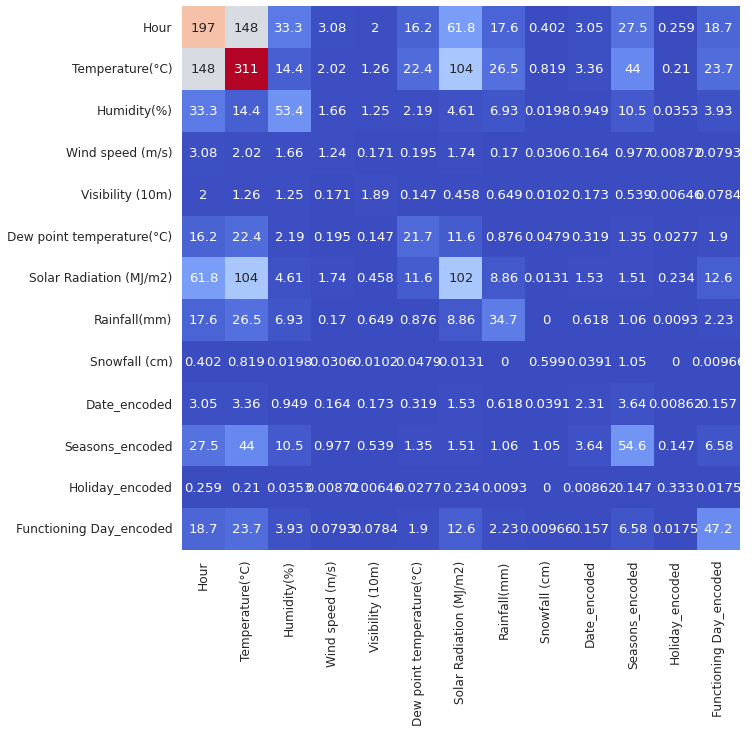

In [41]:
# Get absolute mean of matrices
mean_shap = np.abs(shap_interaction).mean(0)
df = pd.DataFrame(mean_shap,index=X_train.columns,columns=X_train.columns)

# times off diagonal by 2
df.where(df.values == np.diagonal(df),df.values*2,inplace=True)

# display 
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.1)
sns.heatmap(df,cmap='coolwarm',annot=True,fmt='.3g',cbar=False)
plt.yticks(rotation=0) 

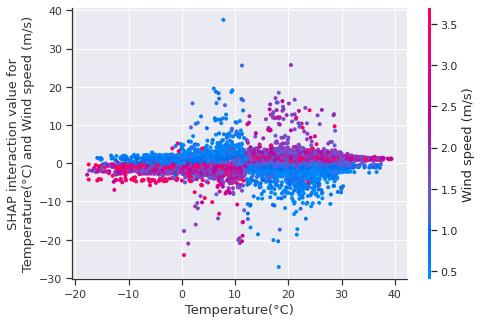

In [42]:
shap.dependence_plot(
    ("Temperature(°C)", "Wind speed (m/s)"),
    shap_interaction, X_train,
    display_features=X_train)


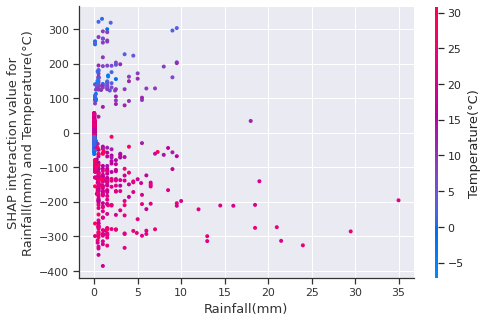

In [43]:
shap.dependence_plot(
    ("Rainfall(mm)", "Temperature(°C)"),
    shap_interaction, X_train,
    display_features=X_train)

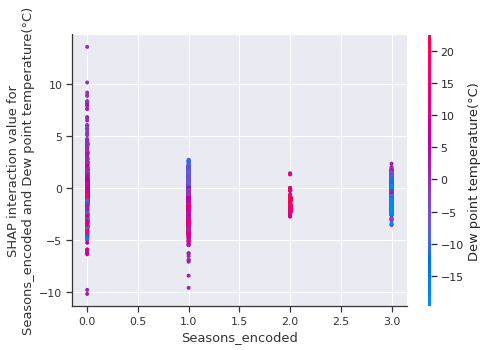

In [44]:
shap.dependence_plot(
    ("Seasons_encoded", "Dew point temperature(°C)"),
    shap_interaction, X_train,
    display_features=X_train)

In [45]:
[]

[]